D plots

[7.1, 6.5, 7.0, 7.9, 7.8, 8.4, 9.0, 9.2, 9.3, 9.5, 10.2, 9.2, 8.7, 8.5, 10.3, 7.6, 4.7, 3.3, 2.9, 6.75]
[5.17, 4.46, 5.47, 5.25, 5.39, 5.45, 6.03, 7.22, 6.04, 6.47, 7.88, 6.7, 5.35, 5.94, 7.65, 6.62, 3.95, 3.37, 2.33, 6.41]
[1.72, 3.78, 1.02, 4.27, 0.0, 5.11, 3.95, 1.0, 4.86, 0.0, 4.52, 3.11, 5.93, 4.18, 2.07, 2.94, 1.3, 4.63, 0.88, 6.5]
[3.8, 3.58, 0.0, 1.04, 0.97, 5.49, 5.37, 1.0, 1.3, 1.03, 5.19, 4.76, 4.82, 4.48, 5.49, 5.57, 4.35, 3.72, 1.01, 0.0]
$1_R^2$ = -5.875
MAE for x1 = 4.737
$2_R^2$ = -5.596
MAE for x2 = 4.586
$3_R^2$ = -0.256
MAE for x3 = 2.042


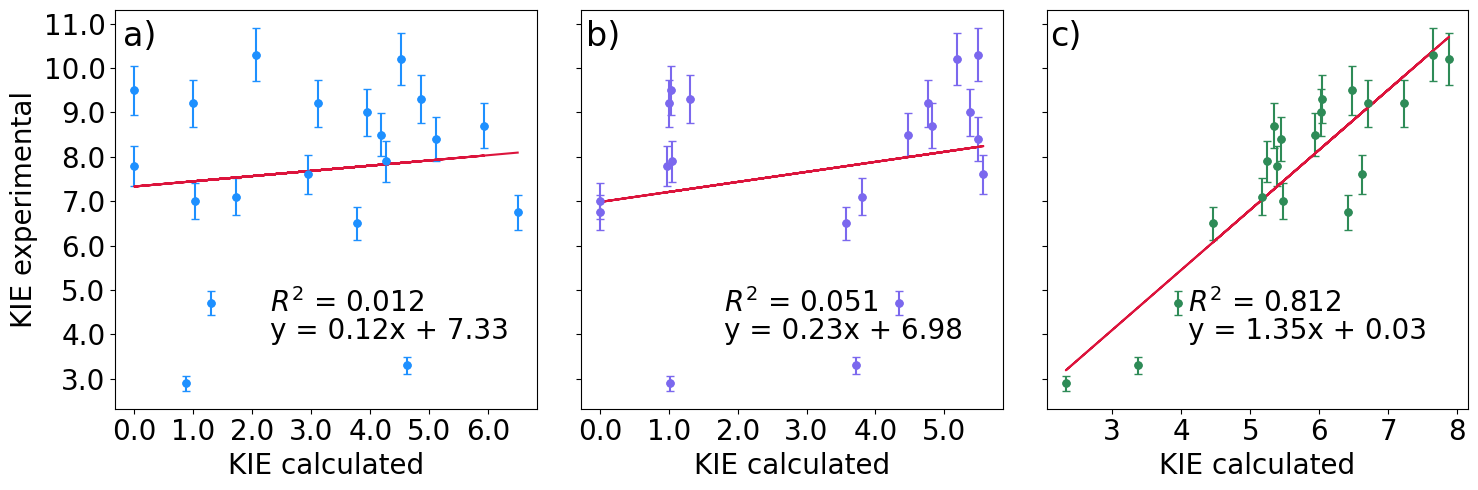

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_absolute_error  # Импортируем mean_absolute_error


f_size_const = 24
f_name_x_pos = -0.2
f_name_y_pos = 10.5
df = pd.read_csv("res_d.csv", sep=";")
#print(df)
exp = df["exp"].to_list()
exp = [float(i.replace(',', '.')) for i in exp]
my = df["my"].to_list()
my = [float(i.replace(',', '.')) for i in my]
print(exp)
print(my)
saddle = df["saddle"].to_list()
saddle = [float(i.replace(',', '.')) for i in saddle]
orca = df["orca"].to_list()
orca = [float(i.replace(',', '.')) for i in orca]
print(saddle)
print(orca)

     
    
# Create a figure with three subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Create some data
y = np.array(exp)
x1 = np.array(saddle)
x2 = np.array(orca)
x3 = np.array(my)
const_err=0.058
y_err = y*const_err
# Plot the first plot in the first subplot

print(f"$1_R^2$ = {r2_score(y, x1):.3f}")
print(f"MAE for x1 = {mean_absolute_error(y, x1):.3f}")  # Добавляем вывод MAE для x1

print(f"$2_R^2$ = {r2_score(y, x2):.3f}")
print(f"MAE for x2 = {mean_absolute_error(y, x2):.3f}")  # Добавляем вывод MAE для x2

print(f"$3_R^2$ = {r2_score(y, x3):.3f}")
print(f"MAE for x3 = {mean_absolute_error(y, x3):.3f}")  # Добавляем вывод MAE для x3




axs[0].scatter(x1, y, linewidth=0, color="dodgerblue")

axs[0].errorbar(x1, y, yerr=y_err, fmt='o', color="dodgerblue",markersize=5, capsize=3)
#axs[0].set_title('proposed_MOPAC')
axs[0].set_xlabel('KIE calculated', fontsize=20)
axs[0].set_ylabel('KIE experimental', fontsize=20)
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.1f}')
axs[0].yaxis.set_major_locator(MultipleLocator(1))
axs[0].yaxis.set_major_formatter('{x:.1f}')
axs[0].tick_params(axis='both', labelsize=20)
linear_model = np.polyfit(x1, y, 1)
y_l = linear_model[0] * x1 + linear_model[1]
axs[0].plot(x1, y_l, color="crimson")
axs[0].text(2.3, 3.9, f"y = {linear_model[0]:.2f}x + {linear_model[1]:.2f}", fontsize=20)
axs[0].text(2.3, 4.5, f"$R^2$ = {r2_score(y, y_l):.3f}", fontsize=20)
#print(f"$1_R^2$ = {r2_score(y, x1):.3f}")
axs[0].text(f_name_x_pos , f_name_y_pos, f"a)", fontsize=f_size_const)

# Plot the second plot in the second subplot
axs[1].scatter(x2, y, linewidth=0, color="mediumslateblue")
axs[1].errorbar(x2, y, yerr=y_err, fmt='o', color="mediumslateblue",markersize=5, capsize=3)

#axs[1].set_title('b3lyp def2-tzvp d3')
axs[1].set_xlabel('KIE calculated', fontsize=20)
#axs[1].set_ylabel('КИЭ lit.')
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.1f}')
axs[1].yaxis.set_major_locator(MultipleLocator(1))
axs[1].yaxis.set_major_formatter('{x:.1f}')
axs[1].tick_params(axis='both', labelsize=20)
linear_model = np.polyfit(x2, y, 1)
y_l = linear_model[0] * x2 + linear_model[1]
axs[1].plot(x2, y_l, color="crimson")
axs[1].text(1.8, 3.9, f"y = {linear_model[0]:.2f}x + {linear_model[1]:.2f}", fontsize=20)
axs[1].text(1.8, 4.5, f"$R^2$ = {r2_score(y, y_l):.3f}", fontsize=20)
#print(f"$2_R^2$ = {r2_score(y, x2):.3f}")
axs[1].text(f_name_x_pos , f_name_y_pos, f"b)", fontsize=f_size_const)

# Plot the third plot in the third subplot
axs[2].scatter(x3, y, linewidth=0, color="seagreen")
axs[2].errorbar(x3, y, yerr=y_err, fmt='o', color="seagreen",markersize=5, capsize=3)

#axs[2].set_title('saddle MOPAC')
axs[2].set_xlabel('KIE calculated', fontsize=20)
#axs[2].set_ylabel('КИЭ lit.')
axs[2].xaxis.set_major_locator(MultipleLocator(1))
axs[2].yaxis.set_major_locator(MultipleLocator(1))
axs[2].yaxis.set_major_formatter('{x:.1f}')
axs[2].tick_params(axis='both', labelsize=20)
linear_model = np.polyfit(x3, y, 1)
y_l = linear_model[0] * x3 + linear_model[1]
axs[2].plot(x3, y_l, color="crimson")
axs[2].text(4.1, 3.9, f"y = {linear_model[0]:.2f}x + {linear_model[1]:.2f}", fontsize=20    )
axs[2].text(4.1, 4.5, f"$R^2$ = {r2_score(y, y_l):.3f}", fontsize=20)
#print(f"$3_R^2$ = {r2_score(y, x3):.3f}")
axs[2].text(2.1 , f_name_y_pos, f"c)", fontsize=f_size_const)
res_a = linear_model[0]
res_b= linear_model[1]
# Layout so plots do not overlap
fig.tight_layout()

plt.savefig(f"art_D_plot.png", dpi=800)

# Show the plot, 5.25,
plt.show()


T plots

/tmp/ipykernel_3022288/4089722881.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.0)


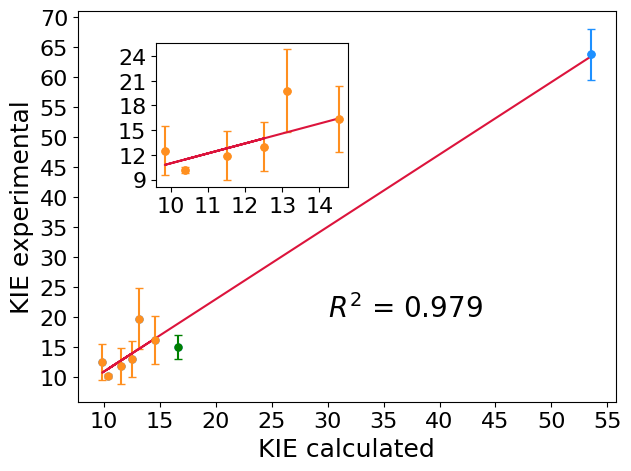

In [5]:
df = pd.read_csv("res_t.csv", sep=";")
#print(df)
exp = df["exp"].to_list()
exp = [float(i) for i in exp]
my = df["my"].to_list()
my = [float(i) for i in my]

y1_err = df["err"].to_list()
y1_err = [float(i) for i in y1_err]
y1_err_11 = y1_err[:2]
y1_err_12 = y1_err[2:]

fig, axs = plt.subplots(1, 1)

# Create some data
y1 = np.array(exp)
x  = np.array(my)

left, bottom, width, height = [0.25, 0.6, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])

x11 = x[:2]
x12 = x[2:]
y11 = y1[:2]
y12 = y1[2:]


axs.errorbar(x11[0], y11[0], yerr=y1_err_11[0], fmt='o', color="dodgerblue",markersize=5, capsize=3)
axs.errorbar(x11[1], y11[1], yerr=y1_err_11[1], fmt='o', color="green",markersize=5, capsize=3)
#axs.errorbar(x11[2], y11[2], yerr=y1_err_11[2], fmt='o', color="darkblue",markersize=5, capsize=3)

axs.errorbar(x12, y12, yerr=y1_err_12, fmt='o', color="#FF8F1F",markersize=5, capsize=3)
#axs.errorbar(x, y1, yerr=y1_err, fmt='o', color="#FF8F1F",markersize=5, capsize=3)
# Plot the first plot in the first subplot
axs.scatter(x, y1, linewidth=0, color="dodgerblue")

ax2.errorbar(x12, y12, yerr=y1_err_12, fmt='o', color="#FF8F1F",markersize=5, capsize=3)
ax2.scatter(x12, y12, linewidth=0, color="#FF8F1F")

axs.tick_params(axis='both', labelsize=16)
ax2.tick_params(axis='both', labelsize=16)

#axs.set_title('proposed_MOPAC T')
axs.set_xlabel('KIE calculated', fontsize=18)
axs.set_ylabel('KIE experimental', fontsize=18)
axs.xaxis.set_major_locator(MultipleLocator(5))
axs.xaxis.set_major_formatter('{x:.0f}')
axs.yaxis.set_major_locator(MultipleLocator(5))
axs.yaxis.set_major_formatter('{x:.0f}')
linear_model = np.polyfit(x, y1, 1)
y_l = linear_model[0] * x + linear_model[1]
y_d = res_a * x + res_b
# res_a = res_a * 1.44
# res_b = res_b * 1.44
linear_model_2 = np.polyfit(x12, y12, 1)
#y_l_2 = linear_model[0] * x + linear_model[1]
y_l2 = linear_model[0] * x12 + linear_model[1]

ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.xaxis.set_major_formatter('{x:.0f}')
ax2.yaxis.set_major_locator(MultipleLocator(3))
ax2.yaxis.set_major_formatter('{x:.0f}')

axs.plot(x, y_l, color="crimson")
#axs.text(30, 20, f"y = {linear_model[0]:.2f}x + {linear_model[1]:.2f}", fontsize=14)
axs.text(30, 20, f"$R^2$ = {r2_score(y1, y_l):.3f}", fontsize=20)

ax2.plot(x12, y_l2, color="crimson")
#axs.text(30, 60, f"y = {res_a:.2f}x + {res_b:.2f}", fontsize=14)
#ax2.text(10, 20, f"$R^2$ = {r2_score(y12, y_l2):.3f}", fontsize=14)


# good
# axs.plot(x, y_l, color="crimson")
# axs.text(10, 50, f"y = {linear_model[0]:.2f}x + {linear_model[1]:.2f}", fontsize=14)
# axs.text(10, 45, f"$R^2$ = {r2_score(y1, y_l):.3f}", fontsize=14)


# axs.text(12,17, f"y = {linear_model[0]:.2f}x + {linear_model[1]:.2f}", fontsize=14)
# axs.text(12,18, f"$R^2$ = {r2_score(y1, y_l):.3f}", fontsize=14)
plt.tight_layout(pad=1.0) 
plt.savefig(f"art_T_plot.png", dpi=800)
#plt.savefig(f"art_T_plot_not_all.png", dpi=800)
plt.show()

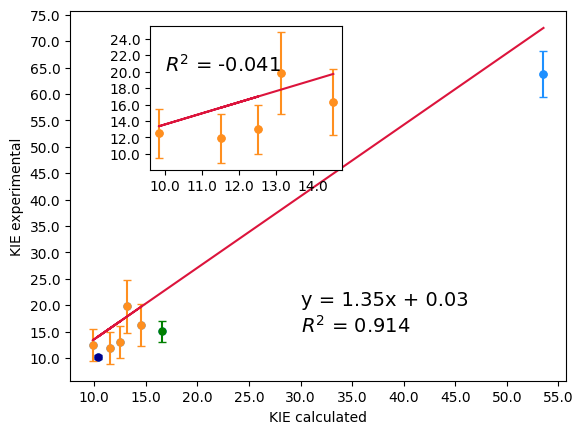

In [28]:
df = pd.read_csv("res_t.csv", sep=";")
#print(df)
exp = df["exp"].to_list()
exp = [float(i) for i in exp]
my = df["my"].to_list()
my = [float(i) for i in my]

y1_err = df["err"].to_list()
y1_err = [float(i) for i in y1_err]
y1_err_11 = y1_err[:3]
y1_err_12 = y1_err[3:]

fig, axs = plt.subplots(1, 1)

# Create some data
y1 = np.array(exp)
x  = np.array(my)

left, bottom, width, height = [0.25, 0.55, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])

x11 = x[:3]
x12 = x[3:]
y11 = y1[:3]
y12 = y1[3:]


axs.errorbar(x11[0], y11[0], yerr=y1_err_11[0], fmt='o', color="dodgerblue",markersize=5, capsize=3)
axs.errorbar(x11[1], y11[1], yerr=y1_err_11[1], fmt='o', color="green",markersize=5, capsize=3)
axs.errorbar(x11[2], y11[2], yerr=y1_err_11[2], fmt='o', color="darkblue",markersize=5, capsize=3)

axs.errorbar(x12, y12, yerr=y1_err_12, fmt='o', color="#FF8F1F",markersize=5, capsize=3)
#axs.errorbar(x, y1, yerr=y1_err, fmt='o', color="#FF8F1F",markersize=5, capsize=3)
# Plot the first plot in the first subplot
axs.scatter(x, y1, linewidth=0, color="dodgerblue")

ax2.errorbar(x12, y12, yerr=y1_err_12, fmt='o', color="#FF8F1F",markersize=5, capsize=3)
ax2.scatter(x12, y12, linewidth=0, color="#FF8F1F")

#axs.set_title('proposed_MOPAC T')
axs.set_xlabel('KIE calculated')
axs.set_ylabel('KIE experimental')
axs.xaxis.set_major_locator(MultipleLocator(5))
axs.xaxis.set_major_formatter('{x:.1f}')
axs.yaxis.set_major_locator(MultipleLocator(5))
axs.yaxis.set_major_formatter('{x:.1f}')
linear_model = np.polyfit(x, y1, 1)
y_l = linear_model[0] * x + linear_model[1]

# res_a = res_a / 1.44
# res_b = res_b / 1.44
y_d = res_a * x + res_b

linear_model_2 = np.polyfit(x12, y12, 1)
#y_l_2 = linear_model[0] * x + linear_model[1]
y_l2 = linear_model[0] * x12 + linear_model[1]
y_d2 = (res_a * x12 + res_b)*1

ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.xaxis.set_major_formatter('{x:.1f}')
ax2.yaxis.set_major_locator(MultipleLocator(2))
ax2.yaxis.set_major_formatter('{x:.1f}')

axs.plot(x, y_d, color="crimson")
axs.text(30, 20, f"y = {res_a:.2f}x + {res_b:.2f}", fontsize=14)
axs.text(30, 15, f"$R^2$ = {r2_score(y1, y_d):.3f}", fontsize=14)

ax2.plot(x12, y_d2, color="crimson")
#axs.text(30, 60, f"y = {res_a:.2f}x + {res_b:.2f}", fontsize=14)
ax2.text(10, 20, f"$R^2$ = {r2_score(y12, y_d2):.3f}", fontsize=14)


# good
# axs.plot(x, y_l, color="crimson")
# axs.text(10, 50, f"y = {linear_model[0]:.2f}x + {linear_model[1]:.2f}", fontsize=14)
# axs.text(10, 45, f"$R^2$ = {r2_score(y1, y_l):.3f}", fontsize=14)


# axs.text(12,17, f"y = {linear_model[0]:.2f}x + {linear_model[1]:.2f}", fontsize=14)
# axs.text(12,18, f"$R^2$ = {r2_score(y1, y_l):.3f}", fontsize=14)

plt.savefig(f"art_T_plot_subs.png", dpi=800)
#plt.savefig(f"art_T_plot_not_all.png", dpi=800)
plt.show()

Num of el

In [1]:
from ase.io import read

# Load the .xyz file
mol = read('molecule.xyz')

# Get the number of electrons for each atom1
num_electrons = [atom.number for atom in mol]
pr
# Calculate the total number of electrons
total_electrons = sum(num_electrons)

print(total_electrons)

FileNotFoundError: [Errno 2] No such file or directory: 'molecule.xyz'

Exp Errors

In [4]:
S = 0.1/7+0.9/8.4+0.4/9.3+0.5/8.6+0.1/7.9+1.2/9+0.7/9.8+0.2/10.2
print(S/8)


0.05745085434346566
